In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
#%matplotlib qt5
#%matplotlib
#%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [ ]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [7]:
dt_df = pd.read_csv('data_csv\\0600352.XSHG.csv',index_col=0,parse_dates=True)
stockID ='600352'

In [8]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [9]:
dt_df.head()

,high,close,open,volume,low,total_turnover,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,9.3653,9.2782,9.3459,672500.0,9.2782,6475790.0,0
2019-01-02 09:40:00,9.2782,9.2685,9.2782,556700.0,9.2492,5332321.0,1
2019-01-02 09:45:00,9.2685,9.2395,9.2685,922644.0,9.2105,8808158.0,2
2019-01-02 09:50:00,9.2395,9.1911,9.2395,1793800.0,9.1331,17020099.0,3
2019-01-02 09:55:00,9.2105,9.1814,9.1911,559200.0,9.1814,5317554.0,4


## get data list

In [10]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [ ]:
idx.shape

In [ ]:
idx.head()

### Find Market Open

In [ ]:
idx['internal'] = idx['datetime'].diff()

In [ ]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

In [ ]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

### Get 属性数据

In [11]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [12]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [13]:
m = Market(4)
Stick.mm = m
Trend.m = m
Trend.ef = ef
Pair.m = m
PairChain.m = m
PairChain.ef = ef
CenterStrict.m = m
Signal001.m = m
Signal001.ef = ef

In [14]:
Signal001.L = m.SIG_L
Signal001()

SIG0010-0(TmS:0, 0, 0, 0)

In [15]:
Stick.L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 9.3459, 0))

In [16]:
TrendLv1 = type('TrendLv1', (Trend,), {'L':m.Lv1_L, 'ML':Stick.L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'L':m.Lv2_L, 'ML':TrendLv1.L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'L':m.Lv3_L, 'ML':TrendLv2.L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 9.3459, 0))

In [17]:

Center0 = type('Center0', (CenterStrict,), {'ML': m.findList('st', 0), 'L': m.findList('center', 0), 'openL':[],  'level': 0})
Center0()
Center1 = type('Center1', (CenterStrict,), {'ML': m.findList('st', 1), 'L': m.findList('center', 1), 'openL':[],  'level': 1})
Center1()
Center2 = type('Center2', (CenterStrict,), {'ML': m.findList('st', 2), 'L': m.findList('center', 2), 'openL':[],  'level': 2})
Center2()
Center3 = type('Center3', (CenterStrict,), {'ML': m.findList('st', 3), 'L': m.findList('center', 3), 'openL':[],  'level': 3})
Center3()

Center3(0, 1, 0, 0)

In [18]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv3 = PairChain(3, 'PairChainLv3')

In [19]:
SIG_overlapMv.m, SIG_overlapMv.ef = m, ef
actions = []
level = 1
actions.append({ 'level_num': level, 
            'obj_name': 'TrendLv' +str(int(level)),
            'event_name': 'NEW',
            'obj_p': 'SIG_overlapMv',
            'method': 'any_opp',
            'param': str(level)  })
for ac in actions:
    ef.regAction(**ac)

In [ ]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [ ]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [ ]:
'''PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()
'''

In [20]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 9.3459, 0))],
   [Trend1(0, 0, Point(0.0, 9.3459, 0))],
   [Trend2(0, 0, Point(0.0, 9.3459, 0))],
   [Trend3(0, 0, Point(0.0, 9.3459, 0))],
   []],
  'pair': [[Pair0(TmS:0.0, 0, [0])],
   [Pair0(TmS:0.0, 0, [0])],
   [Pair0(TmS:0.0, 0, [0])],
   [Pair0(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x17800cf8>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[], [], [], [], []],
  'center': [[Center0(0, 1, 0, 0)],
   [Center1(0, 1, 0, 0)],
   [Center2(0, 1, 0, 0)],
   [Center3(0, 1, 0, 0)],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 9.3459, 0))],
 'PLv0_L': [Pair0(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x17800cf8>],
 'MPLv0_L': [],
 'PT01Lv0_L': [],
 'CLv0_L': [Center0(0, 1, 0, 0)],
 'Lv1_L': [Trend1(0, 0, Point(0.0, 9.3459, 0))],
 'PLv1_L': [Pair0(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x17800d68>],
 'MPLv1_L': [],
 'PT01Lv1_L

In [21]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'updateAll'],
    'obj_p': ['m.Lv1_L[-1]',
     'm.PCLv0_L[0]',
     'Center0',
     'm.PLv0_L[-1]',
     'm.SIG_L[0]'],
    'param': ['', '', '', '', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': [], 'obj_p': [], 'param': []},
   'NEW_llv': {'method': ['newCenter'],
    'obj_p': ['m.CLv0_L[0]'],
    'param': ['obj="pair", level=0, i=-1']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2',
     'update2',
     'updateAll',
     'distr',
     'newCenter',
     'any_opp'],
    'obj_p': ['m.Lv2_L[-1]',
     'm.PCLv1_L[0]',
     'Center1',
     'm.PLv1_L[-1]',
     'm.CLv0_L[0]

In [22]:
Position.m = m
Position.L = m.position

In [23]:
time_start=time.time()
main()
time_end=time.time()
print('totally cost：',time_end-time_start)

TmIdx:8.0,[[<frame.Event object at 0x0000000017398128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16.0,[[<frame.Event object at 0x0000000017803AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:17.0,[[<frame.Event object at 0x0000000017803A58>]]
(0, PairChainLv0, NEW)
TmIdx:26.0,[[<frame.Event object at 0x0000000017803400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
Not Prepared!!!!
TmIdx:26.0,[[<frame.Event object at 0x0000000017803AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:27.0,[[<frame.Event object at 0x0000000017803B00>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:32.0,[[<frame.Event object at 0x00000000178039B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1]

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:675.0,[[<frame.Event object at 0x000000001787AEF0>, <frame.Event object at 0x000000001787AF98>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:677.0,[[<frame.Event object at 0x000000001787ABA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:678.0,[[<frame.Event object at 0x000000001787ADA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:679.0,[[<frame.Event object at 0x000000001787AD68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:681.0,[[<frame.Event object at 0x000000001787A8D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:684.0,[[<frame.Event object at 0x000000001788A128>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:684.0,[[<frame.Event object at 0x000000001787A8D0>]]
(1, TrendLv1, LVUPD

TmIdx:1108.0,[[<frame.Event object at 0x00000000178C6C50>]]
(0, PairChainLv0, NEW)
TmIdx:1118.0,[[<frame.Event object at 0x00000000178C6DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1119.0,[[<frame.Event object at 0x00000000178C6BE0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1128.0,[[<frame.Event object at 0x00000000178C6E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1128.0,[[<frame.Event object at 0x00000000178C6BE0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1129.0,[[<frame.Event object at 0x00000000178CE208>]]
(0, PairChainLv0, NEW)
TmIdx:1131.0,[[<frame.Event object at 0x00000000178CE080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1132.0,[[<frame.

TmIdx:1557.0,[[<frame.Event object at 0x0000000017B39748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1568.0,[[<frame.Event object at 0x0000000017B39978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1569.0,[[<frame.Event object at 0x0000000017B399E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1573.0,[[<frame.Event object at 0x0000000017B39B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1574.0,[[<frame.Event object at 0x0000000017B39A90>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1580.0,[[<frame.Event object at 0x0000000017B39CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1581.0,[[<frame.Event object at 0x0000000017B39EB8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1583.0,[[<f

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1850.0,[[<frame.Event object at 0x0000000017B70048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1851.0,[[<frame.Event object at 0x0000000017B702E8>]]
(0, PairChainLv0, NEW)
TmIdx:1856.0,[[<frame.Event object at 0x0000000017B70400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1857.0,[[<frame.Event object at 0x0000000017B701D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:1860.0,[[<frame.Event object at 0x0000000017B704E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:1860.0,[[<frame.Event object at 0x0000000017B701D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1861.0,[[<frame.Event object at 0x0

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2230.0,[[<frame.Event object at 0x0000000017BBCCC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2230.0,[[<frame.Event object at 0x0000000017BBC9E8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:2231.0,[[<frame.Event object at 0x0000000017BBCF60>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2231.0,[[<frame.Event object at 0x0000000017BBCCF8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:2232.0,[[<frame.Event object at 0x0000000017BC70F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2232.0,[[<frame.Event object at 0x0000000017BBCCF8>]]
(1, TrendLv1, LVUPD)


TmIdx:2472.0,[[<frame.Event object at 0x0000000017BFE128>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2478.0,[[<frame.Event object at 0x0000000017BFE6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2478.0,[[<frame.Event object at 0x0000000017BFE128>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:2478.0,[[<frame.Event object at 0x0000000017BFE6D8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2479.0,[[<frame.Event object at 0x0000000017BFEB00>]]
(0, PairChainLv0, NEW)
TmIdx:2479.0,[[<frame.Event object at 0x0000000017BFEC18>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:2482.0,[[<frame.Event object at 0x0000000017BFEBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PC

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2918.0,[[<frame.Event object at 0x0000000017C2F6D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2922.0,[[<frame.Event object at 0x0000000017C2F8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:2923.0,[[<frame.Event object at 0x0000000017C2F940>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:2924.0,[[<frame.Event object at 0x0000000017C2FB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2925.0,[[<frame.Event object at 0x0000000017C2F860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2926.0,[[<frame.Event object at 0x0000000017C2FA20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2927.0,[[<frame.Event object at 0x0000000017C2FA58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2928.0,[[<frame.Event object at 0x0000000017C

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:3266.0,[[<frame.Event object at 0x0000000017E99B70>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3267.0,[[<frame.Event object at 0x0000000017E99DA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3267.0,[[<frame.Event object at 0x0000000017E99E80>]]
(1, PairChainLv1, NEW)
TmIdx:3268.0,[[<frame.Event object at 0x0000000017E99D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3268.0,[[<frame.Event object at 0x0000000017E99DD8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3269.0,[[<frame.Event object at 0x0000000017F04198>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3274.0,[[<frame.Event object at 0x0000000017F04080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3474.0,[[<frame.Event object at 0x0000000017F43160>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:3474.0,[[<frame.Event object at 0x0000000017F43128>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:3475.0,[[<frame.Event object at 0x0000000017F43358>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:3475.0,[[<frame.Event object at 0x0000000017F43390>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:3476.0,[[<frame.Event object at 0x0000000017F43550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3481.0,[[<frame.Event ob

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3681.0,[[<frame.Event object at 0x0000000017F890F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3682.0,[[<frame.Event object at 0x0000000017F89278>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3684.0,[[<frame.Event object at 0x0000000017F89240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3684.0,[[<frame.Event object at 0x0000000017F89278>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:3684.0,[[<frame.Event object at 0x0000000017F89240>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", le

m.SIG_L[0].updateAll()
TmIdx:3984.0,[[<frame.Event object at 0x0000000017FE95F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3985.0,[[<frame.Event object at 0x0000000017FE97B8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3988.0,[[<frame.Event object at 0x0000000017FE9898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:3989.0,[[<frame.Event object at 0x0000000017FE9B00>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:3990.0,[[<frame.Event object at 0x0000000017FE99E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3993.0,[[<frame.Event object at 0x0000000017FE94A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3998.0,[[<frame.Event object at 0x0000000017FE9BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].u

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:4221.0,[[<frame.Event object at 0x0000000018040DA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4221.0,[[<frame.Event object at 0x0000000018040860>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:4223.0,[[<frame.Event object at 0x0000000018040630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4224.0,[[<frame.Event object at 0x0000000018040E80>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4230.0,[[<frame.Event object at 0x0000000018048048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4230.0,[[<frame.Event object at 0x0000000018040DA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4231.0,[[<frame.Event object at 0x0000000018048320>]]
(0, PairChainLv0, NEW)
TmIdx:4232.0,[[<frame.Event object at 0x0000

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4456.0,[[<frame.Event object at 0x0000000018074CF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4457.0,[[<frame.Event object at 0x0000000018074BA8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4461.0,[[<frame.Event object at 0x0000000018074DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4462.0,[[<frame.Event object at 0x0000000018074F60>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4466.0,[[<frame.Event object at 0x0000000018082048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4467.0,[[<frame.Event object at 0x00000000180821D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4469.0,[[<frame.Even

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4600.0,[[<frame.Event object at 0x00000000180AC390>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:4600.0,[[<frame.Event object at 0x00000000180B6128>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4601.0,[[<frame.Event object at 0x00000000180B6390>, <frame.Event object at 0x00000000180AC390>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4601.0,[[<frame.Event object at 0x00000000180B64E0>]]
(1, PairChainLv1, NEW)
TmIdx:4602.0,[[<frame.Event object at 0x00000000180ACCF8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4604.0,[[<frame.Event object at 0x00000000180B60F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:4607.0,[[<frame.Event object at 0x00000000180B6390>]]
(0, Stick, LVUPD)
m.

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:4840.0,[[<frame.Event object at 0x00000000180F8BE0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4841.0,[[<frame.Event object at 0x00000000180F8E80>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:4841.0,[[<frame.Event object at 0x00000000180F8F98>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:4845.0,[[<frame.Event object at 0x00000000180F8F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:4845.0,[[<frame.Event object at 0x00000000180F8F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4846.0,[[<frame.Event object at 0x0000000018105208>]]
(0, PairChainLv0, NEW)
TmIdx:4849.0,[[<frame.Event object at 0x00000000181052E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv

TmIdx:5090.0,[[<frame.Event object at 0x0000000018135EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5091.0,[[<frame.Event object at 0x0000000018135D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5094.0,[[<frame.Event object at 0x0000000018143080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5094.0,[[<frame.Event object at 0x0000000018135D68>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:5094.0,[[<frame.Event object at 0x0000000018135C88>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5095.0,[[<frame.Event object at 0x00000000181432B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5095.0,[[<frame.Event object at 0x0000000018143080>]]
(1, PairChainLv1, NEW)
TmIdx:5096.0,[[

m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:5378.0,[[<frame.Event object at 0x000000001817E978>, <frame.Event object at 0x000000001817EA20>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5379.0,[[<frame.Event object at 0x000000001817EA90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5383.0,[[<frame.Event object at 0x000000001817E5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:14.3299,HL:(14.532370000000002, 15.038545000000006)
New SIG!!!
True
TmIdx:5383.0,[[<frame.Event object at 0x000000001817EA90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5384.0,[[<frame.Event object at 0x000000001817EC50>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair

True
TmIdx:5633.0,[[<frame.Event object at 0x00000000181B3EB8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:5633.0,[[<frame.Event object at 0x00000000181BB2B0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:5634.0,[[<frame.Event object at 0x00000000181BB518>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:5634.0,[[<frame.Event object at 0x00000000181BB588>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:5636.0,[[<frame.Event object at 0x00000000181BB5C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:15.3324,HL:(14.532370000000002, 15.038545000000006)
TmIdx:5636.0,[[<frame.Event ob

m.SIG_L[0].updateAll()
TmIdx:5893.0,[[<frame.Event object at 0x00000000181FFB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5895.0,[[<frame.Event object at 0x00000000181FF550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5897.0,[[<frame.Event object at 0x00000000181FFB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5899.0,[[<frame.Event object at 0x00000000181FFC18>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5911.0,[[<frame.Event object at 0x00000000181FFEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:5912.0,[[<frame.Event object at 0x000000001820A0B8>]]
(0, PairChainLv0, NEW)
TmIdx:5913.0,[[<frame.Event object at 0x00000000181FFEB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5914.0,[[<frame.Event object at 0x00000000181FF9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].u

TmIdx:6263.0,[[<frame.Event object at 0x0000000018260C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6263.0,[[<frame.Event object at 0x0000000018260828>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:6264.0,[[<frame.Event object at 0x0000000018260F28>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6264.0,[[<frame.Event object at 0x0000000018275080>]]
(1, PairChainLv1, NEW)
TmIdx:6273.0,[[<frame.Event object at 0x0000000018275048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6273.0,[[<frame.Event object at 0x0000000018260F28>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6274.0,[[<frame.Event object at 0x0000000018275

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6460.0,[[<frame.Event object at 0x000000001829E208>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6461.0,[[<frame.Event object at 0x000000001829E278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6462.0,[[<frame.Event object at 0x000000001829E128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6464.0,[[<frame.Event object at 0x000000001829E198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6468.0,[[<frame.Event object at 0x000000001829E3C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6468.0,[[<frame.Event object at 0x000000001829E198>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:6469.0,[[<frame.Event object at 0x000000001829E400>]]
(1, PairChainLv1, NEW

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6705.0,[[<frame.Event object at 0x00000000182D2AC8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6706.0,[[<frame.Event object at 0x00000000182D2A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6708.0,[[<frame.Event object at 0x00000000182D27B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6714.0,[[<frame.Event object at 0x00000000182D2BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6714.0,[[<frame.Event object at 0x00000000182D27B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6715.0,[[<frame.Event object at 0x00000000182D2D68>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:6718.0,[[<frame.Event object at 0x00000000182D2908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6720.0,[[<frame.Event ob

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:6953.0,[[<frame.Event object at 0x0000000018300128>]]
(3, TrendLv3, LVUPD)

TmIdx:6954.0,[[<frame.Event object at 0x00000000183005C0>, <frame.Event object at 0x00000000183006A0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6954.0,[[<frame.Event object at 0x00000000183007F0>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:6954.0,[[<frame.Event object at 0x0000000018300940>]]
(2, PairChainLv2, NEW)
TmIdx:6956.0,[[<frame.Event object at 0x00000000183006D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6959.0,[[<frame.Event object at 0x00000000183005F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:6959.0,[[<frame.Event object at 0x00000000183006D8>]]
(1, TrendLv1, LVUPD)
m.

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7184.0,[[<frame.Event object at 0x0000000018330198>]]
(0, PairChainLv0, NEW)
TmIdx:7187.0,[[<frame.Event object at 0x00000000183306A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7187.0,[[<frame.Event object at 0x0000000018330550>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:7188.0,[[<frame.Event object at 0x00000000183309B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7188.0,[[<frame.Event object at 0x0000000018330A90>]]
(1, PairChainLv1, NEW)
TmIdx:7191.0,[[<frame.Event object at 0x0000000018330A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7191.0,[[<frame.Event

TmIdx:7470.0,[[<frame.Event object at 0x0000000018360748>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7470.0,[[<frame.Event object at 0x0000000018360828>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:7474.0,[[<frame.Event object at 0x00000000183607F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7476.0,[[<frame.Event object at 0x0000000018360550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7477.0,[[<frame.Event object at 0x0000000018360908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7479.0,[[<frame.Event object at 0x0000000018360748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7480.0,[[<frame.Event object at 0x0000000018360898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7481.0,[[<frame.Event object at 0x0000000018360940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7484.0,[[<frame.Event object at 0x0000000018360470>]]
(0, Stick, P

TmIdx:7685.0,[[<frame.Event object at 0x000000001838E5F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7695.0,[[<frame.Event object at 0x000000001838E9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7696.0,[[<frame.Event object at 0x000000001838E5C0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:7699.0,[[<frame.Event object at 0x000000001838EB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7700.0,[[<frame.Event object at 0x000000001838E550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7705.0,[[<frame.Event object at 0x000000001838EC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7705.0,[[<frame.Event object at 0x000000001838E550>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7706.0,[[<frame.Event obje

m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7925.0,[[<frame.Event object at 0x00000000183BAB00>]]
(0, PairChainLv0, NEW)
TmIdx:7928.0,[[<frame.Event object at 0x00000000183BAE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:7928.0,[[<frame.Event object at 0x00000000183BAD68>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:7928.0,[[<frame.Event object at 0x00000000183BAE48>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7929.0,[[<frame.Event object at 0x00000000183C0160>, <frame.Event object at 0x00000000183BABE0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7929.0,[[<frame.Event object at 0x00000000183C0278>]]
(1, PairChainLv1, NEW)
TmIdx:7930.0,[[<frame.

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:8319.0,[[<frame.Event object at 0x0000000018413CF8>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:8320.0,[[<frame.Event object at 0x0000000018419198>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8320.0,[[<frame.Event object at 0x00000000184192E8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:8323.0,[[<frame.Event object at 0x00000000184194E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8323.0,[[<frame.Event object at 0x00000000184192E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8324.0,[[<frame.Event object at 0x0000000018419828>, <frame.Event object at 0x00000000184190B8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", le

TmIdx:8562.0,[[<frame.Event object at 0x000000001845D470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8572.0,[[<frame.Event object at 0x000000001845DA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8573.0,[[<frame.Event object at 0x000000001845DC50>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8578.0,[[<frame.Event object at 0x000000001845DD30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8579.0,[[<frame.Event object at 0x000000001845DE80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8582.0,[[<frame.Event object at 0x000000001845DEF0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8583.0,[[<frame.Event object at 0x000000001845DC18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLas

m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8787.0,[[<frame.Event object at 0x0000000018488AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8788.0,[[<frame.Event object at 0x0000000018488828>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:8790.0,[[<frame.Event object at 0x0000000018488BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8792.0,[[<frame.Event object at 0x0000000018488A58>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8796.0,[[<frame.Event object at 0x0000000018488D30>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:8796.0,[[<frame.Event object at 0x0000000018488A58>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_o

m.SIG_L[0].updateAll()
TmIdx:9059.0,[[<frame.Event object at 0x00000000184BA3C8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9060.0,[[<frame.Event object at 0x00000000184BA390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9060.0,[[<frame.Event object at 0x00000000184BA3C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9061.0,[[<frame.Event object at 0x00000000184BA5C0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9069.0,[[<frame.Event object at 0x00000000184BA6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9070.0,[[<frame.Event object at 0x00000000184BA5F8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9072.0,[[<frame.Event object at 0x00000000184BA7F0>]]
(0, Stick, NEW)
m.

m.PCLv0_L[0].updateLastSt()
TmIdx:9315.0,[[<frame.Event object at 0x00000000184E6668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9316.0,[[<frame.Event object at 0x00000000184E66A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9317.0,[[<frame.Event object at 0x00000000184E67F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9319.0,[[<frame.Event object at 0x00000000184E66D8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9322.0,[[<frame.Event object at 0x00000000184E6A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9323.0,[[<frame.Event object at 0x00000000184E6BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9328.0,[[<frame.Event object at 0x00000000184E6B70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9328.0,[[<frame.Event objec

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9600.0,[[<frame.Event object at 0x0000000018513E80>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9601.0,[[<frame.Event object at 0x0000000018513D68>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9604.0,[[<frame.Event object at 0x0000000018513F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9605.0,[[<frame.Event object at 0x000000001851B160>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9607.0,[[<frame.Event object at 0x000000001851B1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9608.0,[[<frame.Event object at 0x000000001851B198>]]
(0, PairChainLv0, NEW_llv)

m.SIG_L[0].updateAll()
TmIdx:9847.0,[[<frame.Event object at 0x000000001854C4A8>]]
(0, PairChainLv0, NEW)
TmIdx:9848.0,[[<frame.Event object at 0x000000001854C6A0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9848.0,[[<frame.Event object at 0x000000001854C5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9849.0,[[<frame.Event object at 0x000000001854C8D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:9852.0,[[<frame.Event object at 0x000000001854C940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:9853.0,[[<frame.Event object at 0x000000001854C908>]]
(0, PairChainLv0, NEW)
TmIdx:9855.0,[[<frame.Event object at 0x000000001854CA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()

TmIdx:10057.0,[[<frame.Event object at 0x0000000018585B70>, <frame.Event object at 0x0000000018585668>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10059.0,[[<frame.Event object at 0x0000000018585B38>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10064.0,[[<frame.Event object at 0x0000000018585C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10069.0,[[<frame.Event object at 0x0000000018585CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10071.0,[[<frame.Event object at 0x0000000018585EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10075.0,[[<frame.Event object at 0x0000000018585BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].update

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10308.0,[[<frame.Event object at 0x00000000185B0E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10309.0,[[<frame.Event object at 0x00000000185B0AC8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10315.0,[[<frame.Event object at 0x00000000185B0FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10315.0,[[<frame.Event object at 0x00000000185B0AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10316.0,[[<frame.Event object at 0x00000000185BD240>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10320.0,[[<frame.Event object at 0x00000000185BD080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10326.0,[[<frame.Event object at 0x00000000185B0AC8>]]
(0, Sti

TmIdx:10607.0,[[<frame.Event object at 0x00000000185ED588>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:10608.0,[[<frame.Event object at 0x00000000185ED208>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10609.0,[[<frame.Event object at 0x00000000185ED5C0>, <frame.Event object at 0x00000000185ED780>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10610.0,[[<frame.Event object at 0x00000000185ED828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10613.0,[[<frame.Event object at 0x00000000185ED8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10613.0,[[<frame.Event object at 0x00000000185ED828>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10935.0,[[<frame.Event object at 0x000000001862E668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10944.0,[[<frame.Event object at 0x000000001862E7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:10944.0,[[<frame.Event object at 0x000000001862E668>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:10944.0,[[<frame.Event object at 0x000000001862E7B8>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10945.0,[[<frame.Event object at 0x000000001862EAC8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:10952.0,[[<frame.Event object at 0x000000001862EB70>]]
(0, St

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11148.0,[[<frame.Event object at 0x000000001865F6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11149.0,[[<frame.Event object at 0x000000001865FBA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11152.0,[[<frame.Event object at 0x000000001865FC18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11153.0,[[<frame.Event object at 0x000000001865FBE0>]]
(0, PairChainLv0, NEW)
TmIdx:11155.0,[[<frame.Event object at 0x000000001865FDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11155.0,[[<frame.Event object at 0x000000001865FC18>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_over

m.SIG_L[0].updateAll()
TmIdx:11438.0,[[<frame.Event object at 0x00000000186A01D0>]]
(0, PairChainLv0, NEW)
TmIdx:11442.0,[[<frame.Event object at 0x00000000186A0320>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11442.0,[[<frame.Event object at 0x00000000186A0048>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:11442.0,[[<frame.Event object at 0x00000000186A0320>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:11442.0,[[<frame.Event object at 0x00000000186A0048>]]
(3, TrendLv3, NEW)
Center3.updateAll()
m.PLv3_L[-1].distr()
m.CLv2_L[0].newCenter(obj="st", level=3, i=-1)
TmIdx:11443.0,[[<frame.Event object at 0x00000000186A05F8>]]
(0, PairChainLv0, NEW_llv)


m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11648.0,[[<frame.Event object at 0x00000000186D1400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11648.0,[[<frame.Event object at 0x00000000186D1438>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11649.0,[[<frame.Event object at 0x00000000186D1668>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11650.0,[[<frame.Event object at 0x00000000186D1390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11654.0,[[<frame.Event object at 0x00000000186D1828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11656.0,[[<frame.Event object at 0x00000000186D1898>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11660.0,[[<frame.Event object at 0x00000000186D18D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update

TmIdx:11933.0,[[<frame.Event object at 0x00000000186F3C88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11933.0,[[<frame.Event object at 0x00000000186F3A58>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11934.0,[[<frame.Event object at 0x00000000186F3F60>]]
(0, PairChainLv0, NEW)
TmIdx:11936.0,[[<frame.Event object at 0x00000000186F3978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11937.0,[[<frame.Event object at 0x0000000018700080>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:11940.0,[[<frame.Event object at 0x0000000018700048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:11940.0,[[<frame.Event object at 0x0000000018700080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updat

Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:12131.0,[[<frame.Event object at 0x000000001872B358>]]
(3, TrendLv3, LVUPD)

TmIdx:12132.0,[[<frame.Event object at 0x000000001872B908>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12132.0,[[<frame.Event object at 0x000000001872B8D0>]]
(2, PairChainLv2, NEW_llv)
m.CLv2_L[0].newCenter(obj="pair", level=2, i=-1)
TmIdx:12139.0,[[<frame.Event object at 0x000000001872B9B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12139.0,[[<frame.Event object at 0x000000001872B8D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12140.0,[[<frame.Event object at 0x000000001872BE48>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12141.0,[[<frame.Event object at 0x000000001872BC50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmId

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12419.0,[[<frame.Event object at 0x0000000018768550>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12422.0,[[<frame.Event object at 0x0000000018768898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12422.0,[[<frame.Event object at 0x0000000018768550>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:12423.0,[[<frame.Event object at 0x0000000018768BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12425.0,[[<frame.Event object at 0x0000000018768C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].upd

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12661.0,[[<frame.Event object at 0x000000001878EEB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12661.0,[[<frame.Event object at 0x000000001878ED68>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12662.0,[[<frame.Event object at 0x00000000187981D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12668.0,[[<frame.Event object at 0x0000000018798240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12669.0,[[<frame.Event object at 0x0000000018798208>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12675.0,[[<frame.Event object at 0x0000000018798390>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
C

TmIdx:12893.0,[[<frame.Event object at 0x00000000187C40F0>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12894.0,[[<frame.Event object at 0x00000000187C4518>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:12894.0,[[<frame.Event object at 0x00000000187C45F8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:12895.0,[[<frame.Event object at 0x00000000187B6C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12899.0,[[<frame.Event object at 0x00000000187C4320>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12901.0,[[<frame.Event object at 0x00000000187C4710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:12901.0,[[<frame.Event object at 0x00000000187C4320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12905.0,[[<frame.Event object at 0x00000000187C4390>]]
(0, Stick,

m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13166.0,[[<frame.Event object at 0x00000000187FE0B8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13169.0,[[<frame.Event object at 0x00000000187FE0F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13169.0,[[<frame.Event object at 0x00000000187FE0B8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:13169.0,[[<frame.Event object at 0x00000000187FE0F0>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:13169.0,[[<frame.Event object at 0x00000000187FE0B8>]]
(3, TrendLv3, LVUPD)

TmIdx:13170.0,[[<frame.Event object at 0x00000000187FE4A

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:13.0325,HL:(13.213359999999996, 13.791279999999988)
New SIG!!!
True
TmIdx:13368.0,[[<frame.Event object at 0x0000000018822EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:13.0325,HL:(13.213359999999996, 13.791279999999988)
New SIG!!!
True
TmIdx:13372.0,[[<frame.Event object at 0x000000001882C160>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:13.0325,HL:(13.213359999999996, 13.791279999999988)
New SIG!!!
True
TmIdx:13383.0,[[<frame.Event object at 0x000000001882C2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:13.0325,HL:(13.213359999999996, 13.791279999999988)
New SIG!!!
True
TmIdx:13383.0,[[<frame.Event object at 0x000000001882C160>]]
(1, TrendLv1, NEW

m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:13586.0,[[<frame.Event object at 0x0000000018859710>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13587.0,[[<frame.Event object at 0x00000000188599E8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13587.0,[[<frame.Event object at 0x0000000018859AC8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:13601.0,[[<frame.Event object at 0x0000000018859A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13601.0,[[<frame.Event object at 0x0000000018859AC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13602.0,[[<frame.Event object at 0x0000000018859EF0>]]
(0, PairChainLv0, NEW)
TmIdx:13606.0,[[<frame.Event object at 0x0000000018859

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13826.0,[[<frame.Event object at 0x0000000018890198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13827.0,[[<frame.Event object at 0x00000000188906D8>]]
(0, PairChainLv0, NEW)
TmIdx:13830.0,[[<frame.Event object at 0x00000000188907F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13831.0,[[<frame.Event object at 0x0000000018890630>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:13832.0,[[<frame.Event object at 0x00000000188908D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:13832.0,[[<frame.Event object at 0x0000000018890630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13833.0,[[<frame.Event object at

m.PCLv0_L[0].updateLastSt()
TmIdx:14057.0,[[<frame.Event object at 0x00000000188B6320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14058.0,[[<frame.Event object at 0x00000000188B64E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14060.0,[[<frame.Event object at 0x00000000188B6710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14064.0,[[<frame.Event object at 0x00000000188B6588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14065.0,[[<frame.Event object at 0x00000000188B64A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14069.0,[[<frame.Event object at 0x00000000188B6978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14069.0,[[<frame.Event object at 0x00000000188B64A8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any

TmIdx:14227.0,[[<frame.Event object at 0x00000000188E1898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14228.0,[[<frame.Event object at 0x00000000188E1828>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14230.0,[[<frame.Event object at 0x00000000188E1A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14232.0,[[<frame.Event object at 0x00000000188E19B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14233.0,[[<frame.Event object at 0x00000000188E1978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14234.0,[[<frame.Event object at 0x00000000188E1B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14235.0,[[<frame.Event object at 0x00000000188E1BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14236.0,[[<frame.Event object at 0x00000000188E1B38>]]
(0, St

TmIdx:14456.0,[[<frame.Event object at 0x0000000018913320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14459.0,[[<frame.Event object at 0x0000000018913898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:11.5583,HL:(12.026139999999998, 12.230064999999996)
New SIG!!!
True
TmIdx:14463.0,[[<frame.Event object at 0x0000000018913B00>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
是否穿刺：p:11.5583,HL:(12.026139999999998, 12.230064999999996)
New SIG!!!
True
TmIdx:14465.0,[[<frame.Event object at 0x0000000018913B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14467.0,[[<frame.Event object at 0x0000000018913A90>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14471.0,[[<frame.Event object at 0x0000000018913DA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.u

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14724.0,[[<frame.Event object at 0x0000000018939358>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14725.0,[[<frame.Event object at 0x0000000018939978>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14731.0,[[<frame.Event object at 0x0000000018939A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14732.0,[[<frame.Event object at 0x0000000018939A20>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:14734.0,[[<frame.Event object at 0x0000000018939BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:14734.0,[[<frame.Event object at 0x0000000018939A20>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCL

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15061.0,[[<frame.Event object at 0x000000001896F470>]]
(0, PairChainLv0, NEW)
TmIdx:15070.0,[[<frame.Event object at 0x000000001896F630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15071.0,[[<frame.Event object at 0x000000001896F400>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15073.0,[[<frame.Event object at 0x000000001896F710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15073.0,[[<frame.Event object at 0x000000001896F400>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15074.0,[[<frame.Event object at 0x000000001896F978>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15078.0,[[<frame.Event object at 0x000000001896F9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1

m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15319.0,[[<frame.Event object at 0x000000001899F710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15323.0,[[<frame.Event object at 0x000000001899F780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15325.0,[[<frame.Event object at 0x000000001899F550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:15325.0,[[<frame.Event object at 0x000000001899F780>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:15328.0,[[<frame.Event object at 0x000000001899FA90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15334.0,[[<frame.Event object at 0x000000001899F7B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15335.0,[[<

TmIdx:15594.0,[[<frame.Event object at 0x00000000189CF5C0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:15595.0,[[<frame.Event object at 0x00000000189CFB70>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15595.0,[[<frame.Event object at 0x00000000189CFC88>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:15600.0,[[<frame.Event object at 0x00000000189CFC18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15602.0,[[<frame.Event object at 0x00000000189CF390>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15605.0,[[<frame.Event object at 0x00000000189CFD30>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15608.0,[[<frame.Event object at 0x00000000189CF9B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15611.0,[[<frame.Event object at

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15881.0,[[<frame.Event object at 0x0000000018A029E8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:15883.0,[[<frame.Event object at 0x0000000018A027B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15884.0,[[<frame.Event object at 0x0000000018A02898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15888.0,[[<frame.Event object at 0x0000000018A02710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15890.0,[[<frame.Event object at 0x0000000018A02AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15891.0,[[<frame.Event object at 0x0000000018A02A20>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15892.0,[[<frame.Event object at 0x0000000018A02A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15893.0,[[<frame.Event object at 0x0000000018A028D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15894.0,[[<frame.Event object at 0x0000000018A02780>]]

Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16151.0,[[<frame.Event object at 0x0000000018A35D30>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:16151.0,[[<frame.Event object at 0x0000000018A35E10>]]
(1, PairChainLv1, NEW)
TmIdx:16152.0,[[<frame.Event object at 0x0000000018A35AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16154.0,[[<frame.Event object at 0x0000000018A35710>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16163.0,[[<frame.Event object at 0x0000000018A35F98>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16163.0,[[<frame.Event object at 0x0000000018A35710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16164.0,[[<frame.Event object at 0x0000000018A422B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16366.0,[[<frame.Event object at 0x0000000018A78198>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16369.0,[[<frame.Event object at 0x0000000018A78780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16370.0,[[<frame.Event object at 0x0000000018A785C0>]]
(0, PairChainLv0, NEW)
TmIdx:16373.0,[[<frame.Event object at 0x0000000018A78940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16374.0,[[<frame.Event object at 0x0000000018A789E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16376.0,[[<frame.Event object at 0x0000000018A78860>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16379.0,[[<frame.Event object at 0x0000000018A78A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16379.0,[[<frame.Event object at 0x00000000

TmIdx:16653.0,[[<frame.Event object at 0x0000000018AA98D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16655.0,[[<frame.Event object at 0x0000000018AA9518>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16662.0,[[<frame.Event object at 0x0000000018AA9C18>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:16662.0,[[<frame.Event object at 0x0000000018AA9518>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16663.0,[[<frame.Event object at 0x0000000018AA9E80>]]
(0, PairChainLv0, NEW)
TmIdx:16663.0,[[<frame.Event object at 0x0000000018AA9C50>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:16669.0,[[<frame.Event object at 0x0000000018AA9F28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.

TmIdx:16854.0,[[<frame.Event object at 0x0000000018AD8DA0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:16854.0,[[<frame.Event object at 0x0000000018AD8F28>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16855.0,[[<frame.Event object at 0x0000000018AE6240>, <frame.Event object at 0x0000000018AD8DD8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16855.0,[[<frame.Event object at 0x0000000018AE63C8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:16856.0,[[<frame.Event object at 0x0000000018AD8DA0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16857.0,[[<frame.Event object at 0x0000000018AD8DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16858.0,[[<frame.Event object at 0x0000000018AE60F0>]]
(0, 

TmIdx:17112.0,[[<frame.Event object at 0x0000000018B133C8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17114.0,[[<frame.Event object at 0x0000000018B13438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17116.0,[[<frame.Event object at 0x0000000018B13358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17129.0,[[<frame.Event object at 0x0000000018B13588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17130.0,[[<frame.Event object at 0x0000000018B136D8>, <frame.Event object at 0x0000000018B13550>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17131.0,[[<frame.Event object at 0x0000000018B13438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17134.0,[[<frame.Event object at 0x0000000018B13240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:17136.0,[[<frame.Event object at 0x0000

m.SIG_L[0].updateAll()
TmIdx:17388.0,[[<frame.Event object at 0x0000000018B32F98>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17389.0,[[<frame.Event object at 0x0000000018B3F4E0>]]
(0, PairChainLv0, NEW)
TmIdx:17394.0,[[<frame.Event object at 0x0000000018B3F3C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17395.0,[[<frame.Event object at 0x0000000018B3F0B8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17401.0,[[<frame.Event object at 0x0000000018B3F5F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17401.0,[[<frame.Event object at 0x0000000018B3F0B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17402.0,[[<frame.Event object at 0x0000000018B3F940>]]
(0, PairChainLv0, NEW)
TmIdx:17404.0,[[<frame.Event object at 0x0000000018B3F78

m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:17569.0,[[<frame.Event object at 0x0000000018B5DBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17569.0,[[<frame.Event object at 0x0000000018B5D6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:17570.0,[[<frame.Event object at 0x0000000018B5DE10>]]
(0, PairChainLv0, NEW)
TmIdx:17571.0,[[<frame.Event object at 0x0000000018B5DC88>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17572.0,[[<frame.Event object at 0x0000000018B5DDA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17575.0,[[<frame.Event object at 0x0000000018B5DF60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17575.0,[[<frame.Even

(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17845.0,[[<frame.Event object at 0x0000000018BA7390>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:17847.0,[[<frame.Event object at 0x0000000018BA7588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:17847.0,[[<frame.Event object at 0x0000000018BA7390>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
m.PCLv1_L[0].update2()
Center1.updateAll()
m.PLv1_L[-1].distr()
m.CLv0_L[0].newCenter(obj="st", level=1, i=-1)
SIG_overlapMv.any_opp(1)
TmIdx:17847.0,[[<frame.Event object at 0x0000000018BA7588>]]
(2, TrendLv2, NEW)
m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:17848.0,[[<frame.Event object at 0x0000000018BA7898>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].n

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18076.0,[[<frame.Event object at 0x0000000018BD5A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18078.0,[[<frame.Event object at 0x0000000018BD5278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18079.0,[[<frame.Event object at 0x0000000018BD5C88>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18080.0,[[<frame.Event object at 0x0000000018BD5DD8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18084.0,[[<frame.Event object at 0x0000000018BD5EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18086.0,[[<frame.Event object at 0x0000000018BE1080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18089.0,[[<frame.Event object at 0x0000000018BE1240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.upd

(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18271.0,[[<frame.Event object at 0x0000000018C1B240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18272.0,[[<frame.Event object at 0x0000000018C1B3C8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18273.0,[[<frame.Event object at 0x0000000018C1B1D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18274.0,[[<frame.Event object at 0x0000000018C1B278>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18275.0,[[<frame.Event object at 0x0000000018C1B358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18279.0,[[<frame.Event object at 0x0000000018C1B588>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18280.0,[[<frame.Event object at 0x0000000018C1B3C8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0]

Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18465.0,[[<frame.Event object at 0x0000000018C4FB70>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18468.0,[[<frame.Event object at 0x0000000018C4FB38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18468.0,[[<frame.Event object at 0x0000000018C4FB70>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18469.0,[[<frame.Event object at 0x0000000018C4FE10>]]
(0, PairChainLv0, NEW)
TmIdx:18470.0,[[<frame.Event object at 0x0000000018C4FE80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18471.0,[[<frame.Event object at 0x0000000018C4FDA0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18472.0,[[<frame.Event object at 0x0000000018C4FF98>]]
(0, Stick, NEW)
m.Lv1_L

TmIdx:18642.0,[[<frame.Event object at 0x0000000018C882B0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18642.0,[[<frame.Event object at 0x0000000018C88278>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:18642.0,[[<frame.Event object at 0x0000000018C885F8>]]
(2, PairChainLv2, NEW)
TmIdx:18650.0,[[<frame.Event object at 0x0000000018C88358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18650.0,[[<frame.Event object at 0x0000000018C88278>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18651.0,[[<frame.Event object at 0x0000000018C888D0>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:18652.0,[[<frame.Event object at 0x0000000018C887B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18655

m.Lv3_L[-1].update2()
m.PCLv2_L[0].update2()
Center2.updateAll()
m.PLv2_L[-1].distr()
m.CLv1_L[0].newCenter(obj="st", level=2, i=-1)
TmIdx:18855.0,[[<frame.Event object at 0x0000000018CB9748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18855.0,[[<frame.Event object at 0x0000000018CB97B8>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:18855.0,[[<frame.Event object at 0x0000000018CB9588>]]
(2, PairChainLv2, NEW)
TmIdx:18856.0,[[<frame.Event object at 0x0000000018CB9860>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:18857.0,[[<frame.Event object at 0x0000000018CB94E0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:18864.0,[[<frame.Event object at 0x0000000018CB9A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:18865.0,[[<frame.Event object at 0x0000000018CB9BA8>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0

TmIdx:19145.0,[[<frame.Event object at 0x0000000018CF1240>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19146.0,[[<frame.Event object at 0x0000000018CF10F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19147.0,[[<frame.Event object at 0x0000000018CF1358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19152.0,[[<frame.Event object at 0x0000000018CF1518>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:19153.0,[[<frame.Event object at 0x0000000018CF16A0>]]
(0, PairChainLv0, NEW)
TmIdx:19158.0,[[<frame.Event object at 0x0000000018CF1668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:19158.0,[[<frame.Event object at 0x0000000018CF1518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19159.0,[[<frame.Event object at 0x0000000018CF1860>]]
(0, PairChainLv0, NEW_llv)
m.C

TmIdx:19431.0,[[<frame.Event object at 0x0000000018D1F7F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19434.0,[[<frame.Event object at 0x0000000018D1F550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19436.0,[[<frame.Event object at 0x0000000018D1F898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19438.0,[[<frame.Event object at 0x0000000018D1F8D0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19439.0,[[<frame.Event object at 0x0000000018D1F470>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19440.0,[[<frame.Event object at 0x0000000018D1F940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19443.0,[[<frame.Event object at 0x0000000018D1F780>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19446.0,[[<frame.Event object at 0x0000000018D1F9E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19447.0,[[<frame.Event object at 0x0000000018D1F908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1

(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
TmIdx:19670.0,[[<frame.Event object at 0x0000000018D52C18>]]
(1, PairChainLv1, NEW_llv)
m.CLv1_L[0].newCenter(obj="pair", level=1, i=-1)
TmIdx:19672.0,[[<frame.Event object at 0x0000000018D52BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
m.PCLv0_L[0].update2()
Center0.updateAll()
m.PLv0_L[-1].distr()
m.SIG_L[0].updateAll()
TmIdx:19672.0,[[<frame.Event object at 0x0000000018D52C18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19673.0,[[<frame.Event object at 0x0000000018D52E10>, <frame.Event object at 0x0000000018D52588>]]
(0, PairChainLv0, NEW_llv)
m.CLv0_L[0].newCenter(obj="pair", level=0, i=-1)
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19675.0,[[<frame.Event object at 0x0000000018D52C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:19676.0,[[<frame.Event object at 0x0000000018D52D68>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:19681.0,[[<frame.Event

In [24]:
len(SIG_overlapMv.L) #59  # is_wiped 之后只剩8个  #cross Center 收紧到0.25 55个
# 中信只有37

44

In [ ]:
ll = m.findList('center', 0)
centerL = []
for cc in ll[::-1]:
    if cc.TmE < 10323:
        break
    if cc.TmS < 10323 <= cc.TmE:
        centerL.append(cc)
centerL

In [ ]:
time_start=time.time()
lll = [l.TmS for l in m.CLv0_L[::-1] if l.TmS < 10323 <l.TmE]
time_end=time.time()
print('totally cost：',time_end-time_start)

In [ ]:
lll

In [ ]:
list0 = [[st.start.TmIdx,st.peak.TmIdx] for st in m.Lv0_L if 10200<st.start.TmIdx<10600]
list1 = [st.start.TmIdx for st in m.Lv1_L if 10200<st.start.TmIdx<10600]
ll =[]
for s,p in list0:
    if s in list1 and p in list1:
        ll.append(s)

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V,st.ML[st.mp[st.pp]].start, st.mp[0]] for st in m.Lv1_L if 10200<st.start.TmIdx<10600]

In [ ]:
[[st.start.TmIdx,st.start.V,st.peak.TmIdx,st.peak.V] for st in m.Lv0_L if 10382<st.start.TmIdx<10465]

In [ ]:
dd99 = [[st.start.TmIdx, st.peak.V, st.ML[st.mp[st.pp-1]].peak.V, st.pp] for st in m.Lv1_L if st.peak.V != st.ML[st.mp[st.pp]].start.V]
len(dd99)

In [ ]:
dd99

In [ ]:
for i,st in enumerate(m.Lv1_L):
    if st.start.TmIdx == 8685:
        print(i)
        break

In [ ]:
SIG_overlapMv.Fremark

In [ ]:
st = m.Lv1_L[270]
st.pp, st.mp

In [ ]:
m.Lv1_L[320].remark

In [ ]:
dd = [[s.TmS, s.drt,s.HTmS, s.HP.drt,s.HP_cc,s.HP_st_len, s.HL_limit,
 dt_df.iloc[int(s.TmS)].name,dt_df.iloc[int(s.TmS)].close,
  dt_df.iloc[int(s.TmS):int(s.TmS)+480]['low'].min(), dt_df.iloc[int(s.TmS):int(s.TmS)+480]['high'].max()] for s in m.SIG_L[2:]]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'sig_drt', 'HTmS','HP.drt','s.HP_cc','s.HP_st_len', 'ccHL', 'Tm', 'V', 'V-min', 'V-max']

In [ ]:
df_out.to_excel('SIG.xlsx')

In [ ]:
m.Lv1_L[94]

In [ ]:
dt_df.iloc[2664].name

In [ ]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [ ]:
dd=[]
dd = [[p.TmS, p.drt, p.S, p.P] for p in m.PCLv2_L[0].cL[0]]
dd

In [ ]:
rangeL, rangeH = dt_df[i-w:i+w].TmIdx.values[0], dt_df[i-w:i+w].TmIdx.values[-1]

In [ ]:
rangeL, rangeH

In [ ]:
m.PCLv0_L[0].cL[0][0].__dict__

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv2.xlsx')

In [ ]:
list(range(4)).reverse()

In [ ]:
for i in list(range(4))[::-1]:
    print(i)

### 快照

In [ ]:
dt_df['close'].plot(figsize=(2000/72,800/72))

### Matplotlib 

In [25]:
# prepare data
y = dt_df['TmIdx'].values.tolist()

In [26]:
x = dt_df['close'].values.tolist()

In [27]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

In [28]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from datetime import datetime

In [29]:
def draw_pairs(ax, data_collection, facecolor='r', edgecolor='None', alpha=0.5, marker=False ):
    # draw pair stick
    for pp in data_collection:
        x = [pp.ML[pp.index[0]].start.TmIdx, pp.ML[pp.index[0]].peak.TmIdx]
        y = [pp.ML[pp.index[0]].start.V, pp.ML[pp.index[0]].peak.V]
        ax.add_line(Line2D(x,y, lw=2, c=facecolor, alpha=alpha))
        if marker:
            ax.text(x[0],y[0], pp.TmS, c= facecolor)
    
    # draw rectangle
    rect =[ Rectangle((pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]),
                      pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3] - pp.ccHL[2])
           for pp in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.5, edgecolor=edgecolor)
    ax.add_collection(pc)  
    if marker:
        for pp in data_collection:
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2], pp.ccHL[2], c='r')
            ax.text(pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[3], pp.ccHL[3], c='r')
    
    return None


In [30]:
def draw_trends(ax, data_collection, linecolor='crimson',  lw=0.5, alpha = None, marker=False ):
    x = [pp.start.TmIdx for pp in data_collection]
    y = [pp.start.V for pp in data_collection]
    ax.add_line(Line2D(x,y, linewidth=lw, color=linecolor, alpha=alpha))
    if marker:
        for st in data_collection:
            ax.text(st.start.TmIdx, st.start.V, st.start, c='navy')
    return None

In [31]:
def draw_center(ax, data_collection, facecolor='r', edgecolor='None', lw=0.5, alpha = None):
     # draw rectangle
    rect =[ Rectangle((cc.TmS, cc.L), cc.TmE - cc.TmS, cc.H - cc.L)
           for cc in data_collection]
    pc = PatchCollection(rect, facecolor=facecolor, alpha=0.2, edgecolor=edgecolor)
    ax.add_collection(pc) 
    return None

In [32]:
# 画放大图
# Input: dt_df, 
#        [s_idx: e_idx], 
def detial_fig(dt_df, s_idx, e_idx):

    ## 拼接 x_label
    dt_df['label2'] = dt_df.index
    dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
    dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
    dt_df.drop(['label2'],axis=1, inplace=True)

    ## x_label 转换函数
    x_fmt = dt_df['label'].values.tolist()
    def format_date(x,pos=None):   
        x = int(x)
        if x<0 or x>len(x_fmt)-1:
            return ''
        return x_fmt[x]

    ## 底图数据 by [s_idx: e_idx]
    x = [s_idx, e_idx]
    y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
    print(x,y)
    
    ## draw
    fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)
    
    #=== 底图设置
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
    ax.plot(x, y, alpha=0)
    
    #=== 
    Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv0_list)
    Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8, marker=True)
    Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
    draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)
    
    center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
    draw_center(ax, center_list0)
    center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
    draw_center(ax, center_list1, facecolor='turquoise')
    
    center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
    #draw_center(ax, center_list2,  facecolor='indigo')
    
    sig_list =[ss for ss in SIG_overlapMv.L if s_idx<=ss.TmInit <=e_idx]
    for ss in sig_list:
        #ax.text(ss.TmInit, ss.sigV+1, ss.remark)
        ax.annotate(ss.remark.split(',')[0], xy=(ss.TmInit, ss.sigV), xytext=(ss.TmInit, ss.sigV+2),
                arrowprops=dict(facecolor='black',headwidth=2,headlength=2, shrink=0.05, width=0.5),
                )
    
    fig.autofmt_xdate()
    plt.savefig('图{}细节-{}-{}.png'.format(stockID,str(int(s_idx)), str(int(e_idx))))
    

In [33]:
# 全景缩略图
# Input: dt_df, 
def detial_fig(dt_df):

    ## 拼接 x_label
    dt_df['label2'] = dt_df.index
    dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
    dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
    dt_df.drop(['label2'],axis=1, inplace=True)
    
    x_data = dt_df['label'].values
    y_data = dt_df['close'].values

    ## x_label 转换函数
    x_fmt = dt_df['label'].values.tolist()
    def format_date(x,pos=None):   
        x = int(x)
        if x<0 or x>len(x_fmt)-1:
            return ''
        return x_fmt[x]
    
    ## draw
    fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)
    
    #=== 底图设置
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(int((len(x_data))/10)))
    ax.plot(x_data, y_data)
    
    
    
    fig.autofmt_xdate()
    plt.savefig('图{}全景.png'.format(stockID))

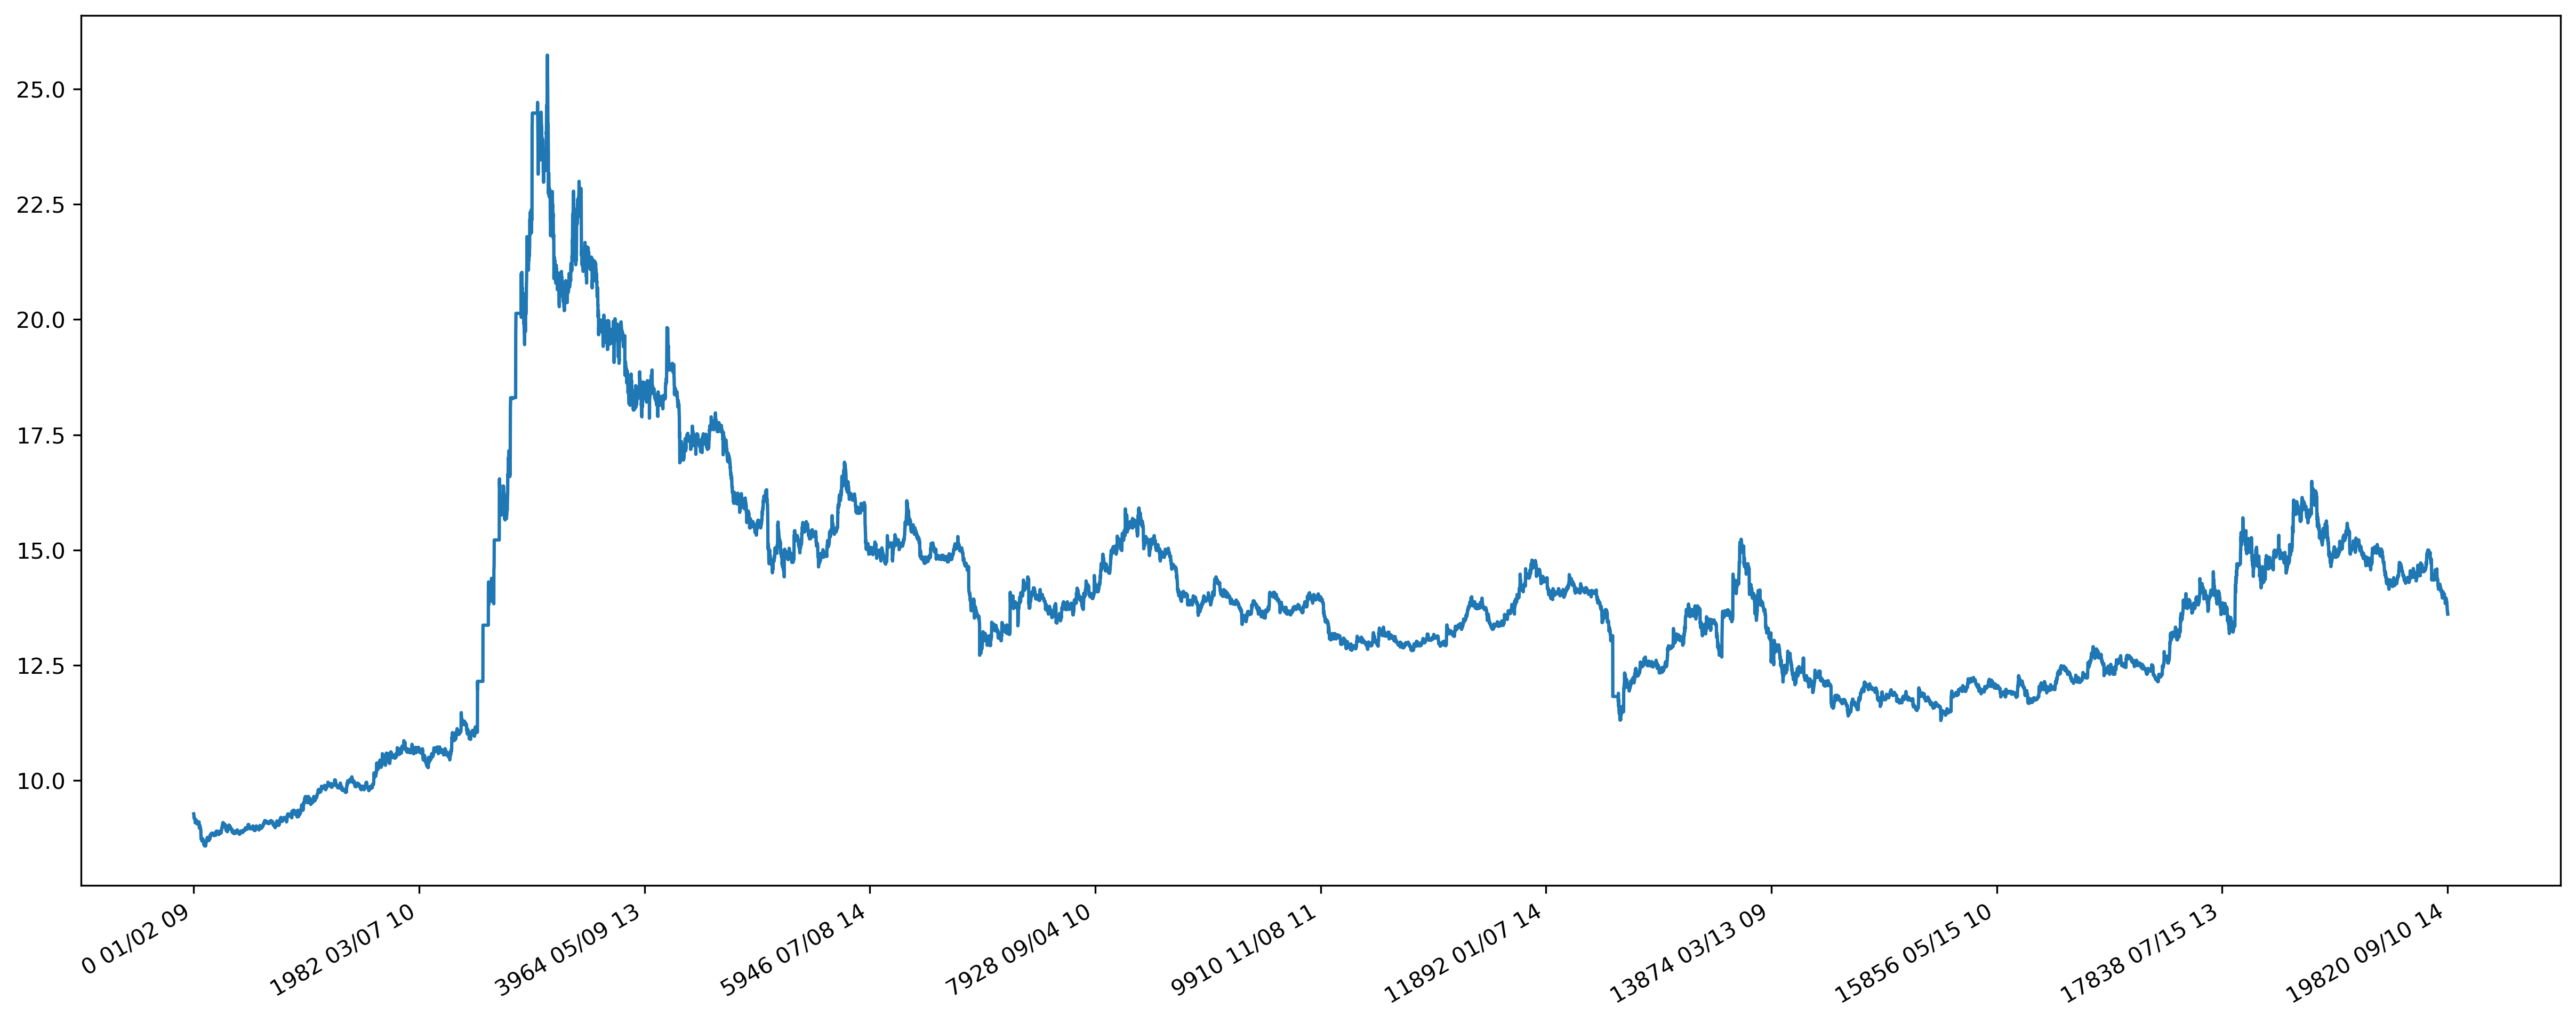

In [34]:
detial_fig(dt_df)

In [35]:
dt_df.iloc[5522].name

Timestamp('2019-06-26 09:45:00')

In [36]:
c = '2019-06-26'
r = 700

c_stp = dt_df[c].index.tolist()[0]
c_idx = int(dt_df.loc[c_stp,'TmIdx'])

s_idx = int(max(0, c_idx-r))
s_stp = dt_df.iloc[int(s_idx),:].name

e_idx = int(min(dt_df.shape[0], c_idx+r+1))
e_stp = dt_df.iloc[int(e_idx),:].name
c_idx, s_idx,s_stp, e_idx, e_stp

(5520,
 4820,
 Timestamp('2019-06-04 11:15:00'),
 6221,
 Timestamp('2019-07-16 13:30:00'))

[8000, 12000] [16.0892, 12.8065]


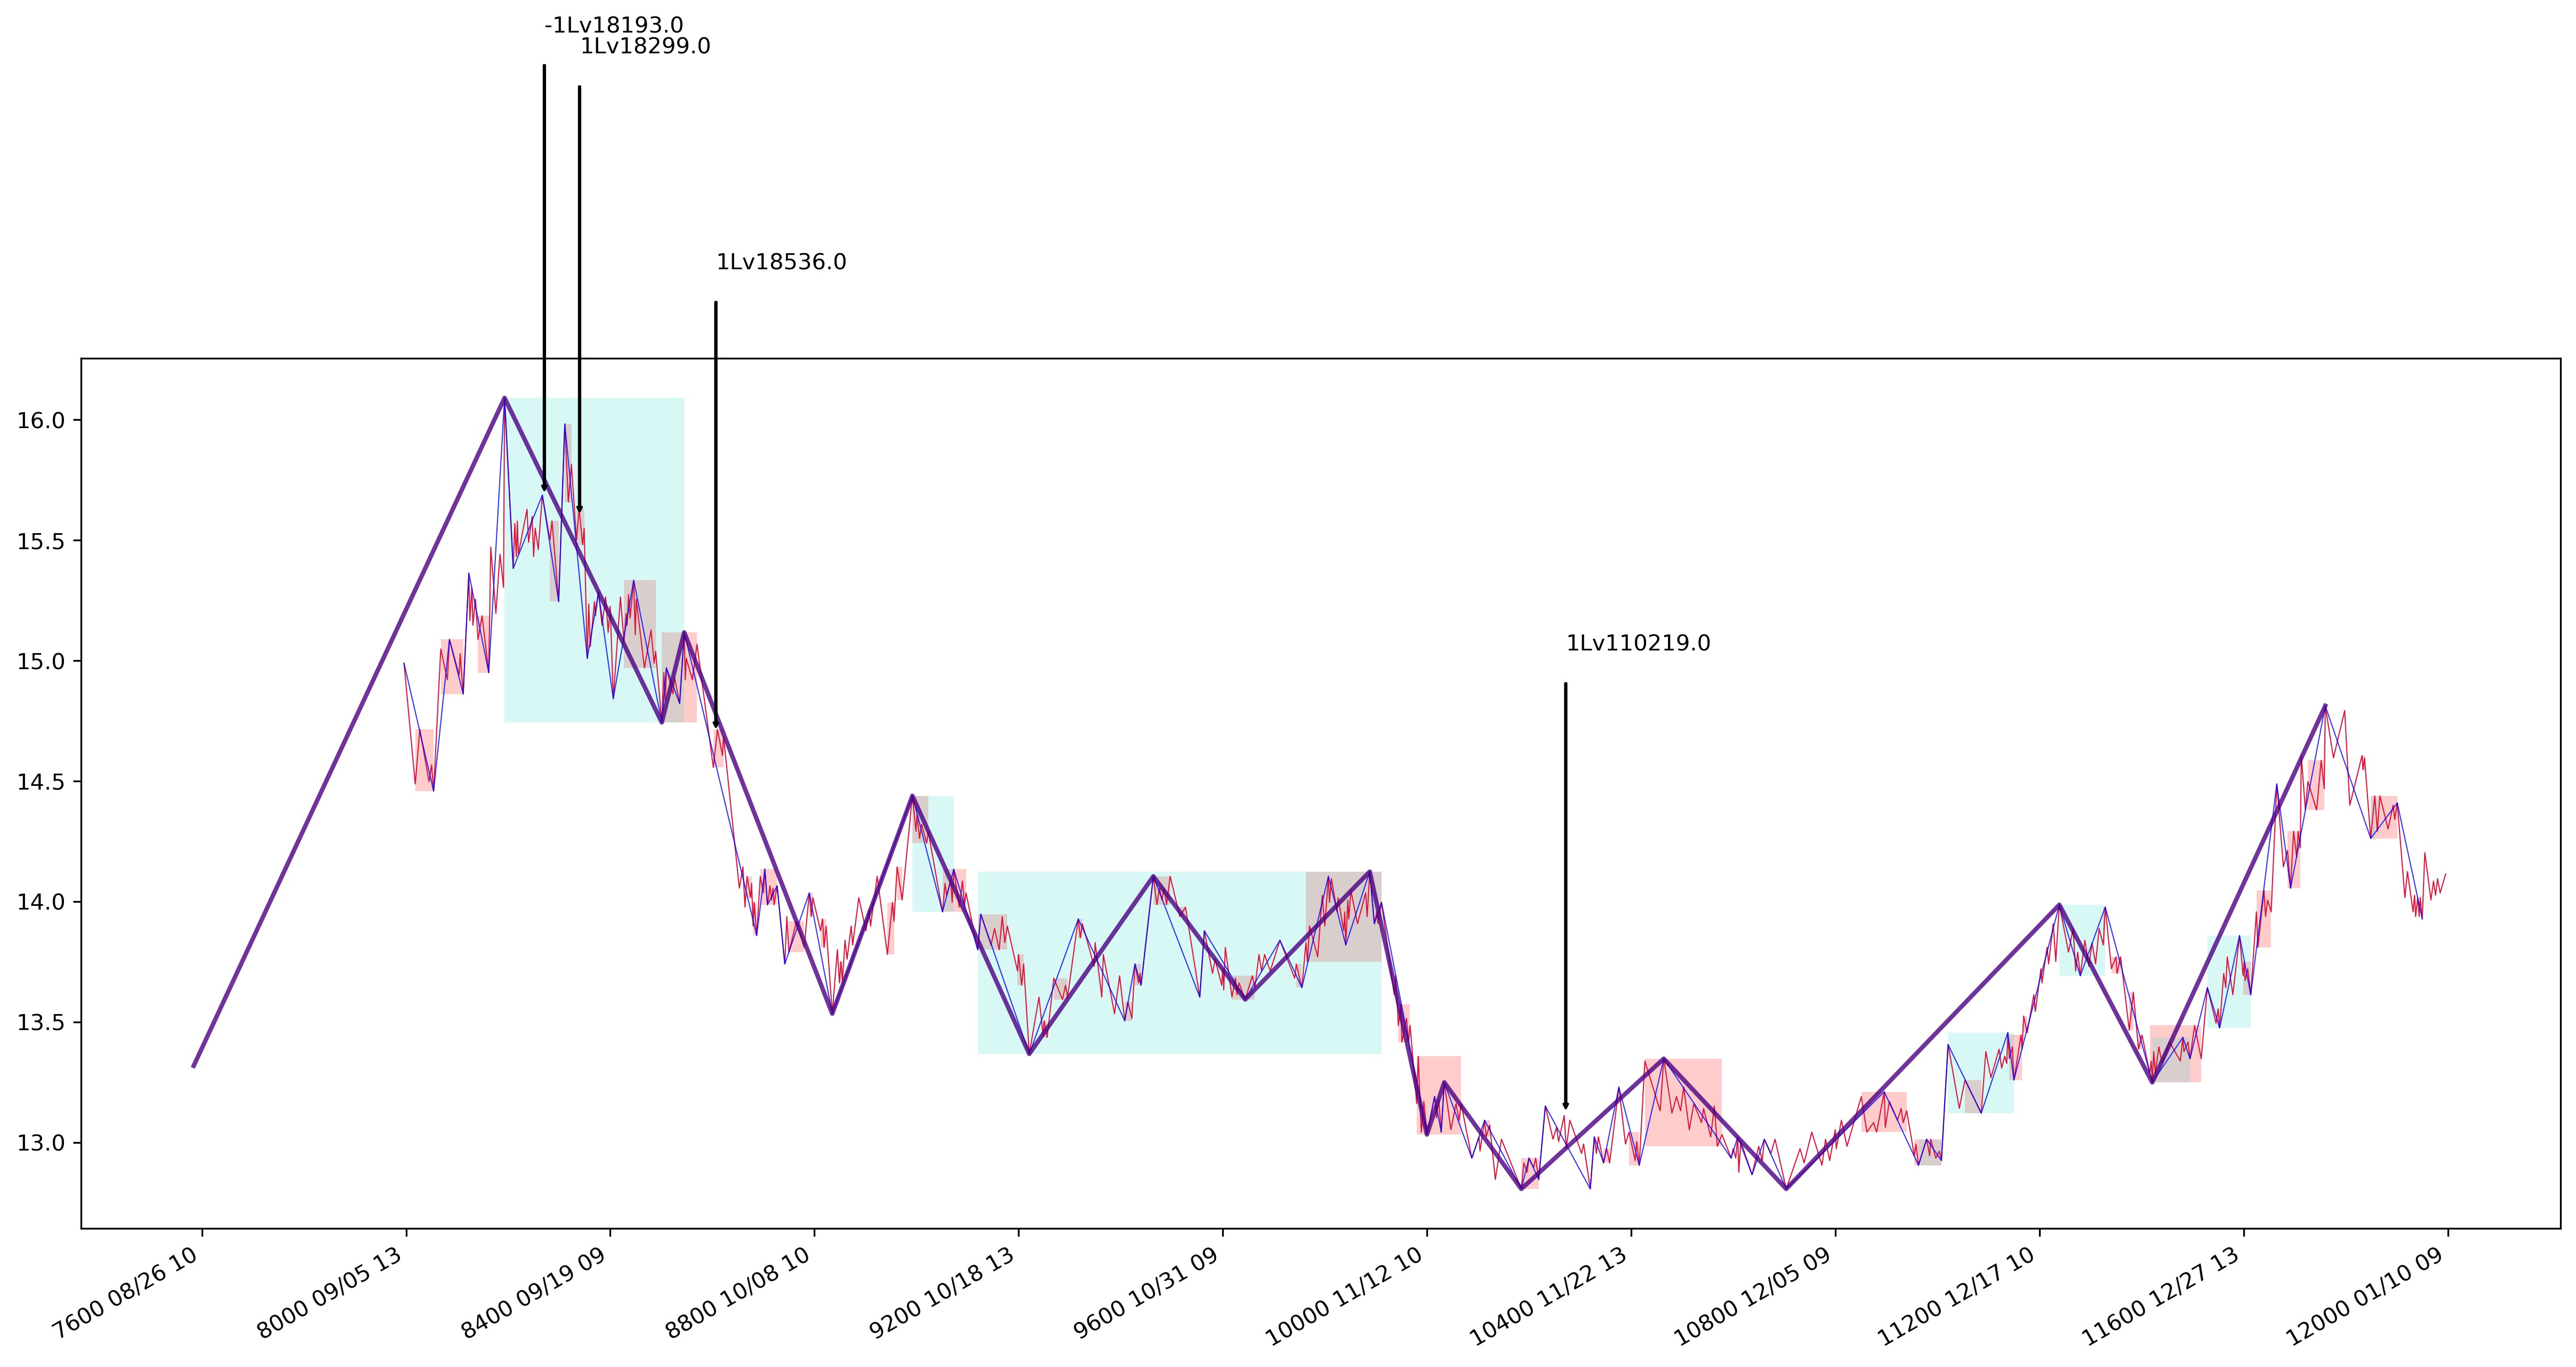

In [39]:
s_idx, e_idx =5000,
# 绘制全景图
# Input: dt_df, 
#        [s_idx: e_idx], 
#       对象列表？？ 

## 拼接 x_label
dt_df['label2'] = dt_df.index
dt_df['label'] = dt_df['label2'].apply(lambda x: x.strftime("%m/%d %H"))
dt_df['label'] = dt_df['TmIdx'].astype('str').str.cat(dt_df['label'], sep=' ')
dt_df.drop(['label2'],axis=1, inplace=True)

## x_label 转换函数
x_fmt = dt_df['label'].values.tolist()
def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

## 底图数据 by [s_idx: e_idx]
x = [s_idx, e_idx]
y = [dt_df.iloc[s_idx:e_idx].high.max(), dt_df.iloc[s_idx:e_idx].low.min()]
print(x,y)

## draw
fig, ax = plt.subplots(figsize=(6000/300, 2400/300), dpi=300)

#=== 底图设置
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(int((e_idx-s_idx)/10)))
ax.plot(x, y, alpha=0)

#=== 
Lv0_list = [st for st in m.Lv0_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv0_list)
Lv1_list = [st for st in m.Lv1_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv1_list, linecolor='b',alpha = 0.8, marker=False)
Lv2_list = [st for st in m.Lv2_L if s_idx<st.peak.TmIdx<=e_idx]
draw_trends(ax, Lv2_list, linecolor='indigo', lw=2, alpha = 0.8)

center_list0 = [cc for cc in m.CLv0_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list0)
center_list1 = [cc for cc in m.CLv1_L if cc.is_main==10 and s_idx<=cc.TmS and cc.TmE <=e_idx]
draw_center(ax, center_list1, facecolor='turquoise')

center_list2 = [cc for cc in m.CLv2_L if s_idx<=cc.TmS and cc.TmE <=e_idx]
#draw_center(ax, center_list2,  facecolor='indigo')

sig_list =[ss for ss in SIG_overlapMv.L if s_idx<=ss.TmInit <=e_idx]
for ss in sig_list:
    #ax.text(ss.TmInit, ss.sigV+1, ss.remark)
    ax.annotate(ss.remark.split(',')[0], xy=(ss.TmInit, ss.sigV), xytext=(ss.TmInit, ss.sigV+2),
            arrowprops=dict(facecolor='black',headwidth=2,headlength=2, shrink=0.05, width=0.5),
            )
'''
pair_list = [pp for pp in m.PLv0_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list)
pair_list1 = [pp for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list1, facecolor='turquoise', alpha=0.8)
pair_list2 = [pp for pp in m.PLv2_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<e_idx]
draw_pairs(ax, pair_list2, facecolor='violet',marker=False, alpha=0.8)
'''

fig.autofmt_xdate()
plt.savefig('图{}-{}_{}.png'.format(stockID, str(int(s_idx)), str(int(e_idx))))

In [ ]:
c = 5600
r = 100
s_idx, e_idx = c-r, c+r

detial_fig(dt_df, s_idx, e_idx)

In [ ]:
for s in SIG_overlapMv.L:
    if s.lv_TmS == 10323:
        print(s.remark)
        break

In [ ]:
#[10323.0, 10367.0, 10419.0]

In [ ]:
for st in m.Lv1_L:
    if st.start.TmIdx == 10323:
        print(st.start.V, st.peak.V, st.mp[st.pp], st.ML[st.mp[st.pp] - 1].peak, st.ML[st.mp[st.pp]], m.Lv1_L.index(st))
        break

In [ ]:
[[st.start.V, st.peak.V] for st in m.Lv0_L[1520:1525]]
    

In [ ]:
[st for st in m.Lv3_L if s_idx<st.peak.TmIdx<=13000]

In [ ]:
[[pp.TmS, pp.drt, pp.ccHL[3],pp.ccHL[2]] for pp in m.PLv1_L 
             if pp.chain_layer == 0 and s_idx<pp.ML[pp.index[0]].peak.TmIdx<11500]

In [ ]:
m.Lv0_L[0].start

In [ ]:
pp = m.PLv0_L[4]

In [ ]:
[( (pp.ML[pp.index[0]].peak.TmIdx, pp.ccHL[2]), 
  pp.ML[pp.index[-1]].peak.TmIdx - pp.ML[pp.index[0]].peak.TmIdx,
  pp.ccHL[3] - pp.ccHL[2]) 
 for pp in m.PLv0_L[1:5]]

In [ ]:
dt_df.iloc[168].name

In [ ]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[80:220].index
x_idx = dt_df[80:220].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x) -x_idx[0]
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))

# get xy data
x = data_up.TmIdx.values
ymin = data_up.open.values
ymax = data_up.close.values
ax.vlines(x, ymin, ymax, color='r', lw=5)
ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
x = data_down.TmIdx.values
ymin = data_down.close.values
ymax = data_down.open.values
ax.vlines(x, ymin, ymax, color='g', lw=5)
ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)

#x = [d[0] for d in dd[:10]]
#y = [d[1] for d in dd[:10]]
#ax.plot(x, y, color='b')


fig.autofmt_xdate()
plt.savefig("image01.png")
#plt.show()

In [ ]:
def candel_plotter(ax, data_df, i, w):
    data = data_df[i-w:i+w]
    data_up = data.query('open <= close')
    data_down = data.query('open > close')
    
    x = data_up.TmIdx.values
    ax.vlines(x, data_up.open.values, data_up.close.values, color='r', lw=5)
    ax.vlines(x, data_up.low.values, data_up.high.values, color='r', lw=1)
    x = data_down.TmIdx.values
    ax.vlines(x, data_down.close.values, data_down.open.values, color='g', lw=5)
    ax.vlines(x, data_down.low.values, data_down.high.values, color='g', lw=1)
    
    #out = ax.plot(data1, data2, **param_dict)
    return None

In [ ]:
i, w = 10000,50
fig, ax = plt.subplots(1, 1,figsize=(1200/72,480/72))

# format the ticks
tmLabel = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].index
x_idx = dt_df[i-w-int(w*0.3):i+w+int(w*0.3)].TmIdx.values.tolist()
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0:
        return ''
    else:
        x2 = x_idx.index(x)
    return x_fmt[x2]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


candel_plotter(ax, dt_df, i, w)
fig.autofmt_xdate()
plt.show()

In [ ]:
x_fmt[18]

In [ ]:
dt_df[500:501].index

In [ ]:
dt_df.loc['2019-11-8 13':'2019-11-11']

In [ ]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [ ]:
pd.core.index

In [ ]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [ ]:
def verity_valley_after_peak(lv_L):
    return True

In [ ]:
verify_end_to_end(m.Lv1_L)

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
tmIdx = 15929


In [ ]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [ ]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

In [ ]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [ ]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [ ]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [ ]:
draw_k(15027,500)

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [ ]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

### draw Pair

In [ ]:
p = find_pair(tmIdx,0)[1]
p.__dict__

In [ ]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [ ]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

In [ ]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

In [ ]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

In [ ]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

In [ ]:
df_p

In [ ]:
df_draw.fillna('', inplace=True)
df_draw

In [ ]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [ ]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [ ]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [ ]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)